<h2>Исследование причины плохой окупаемости приложения Procrastinate Pro+.<a class="tocSkip"> </h2>

<b>Исходные данные</b> - развлекательное приложение Procrastinate Pro+

<b>Описание проекта:</b> \
Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Задача — разобраться в причинах и помочь компании выйти в плюс.\
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
+ лог сервера с данными об их посещениях,
+ выгрузка их покупок за этот период,
+ рекламные расходы. 

Предстоит изучить:
+ откуда приходят пользователи и какими устройствами они пользуются,
+ сколько стоит привлечение пользователей из различных рекламных каналов;
+ сколько денег приносит каждый клиент,
+ когда расходы на привлечение клиента окупаются,
+ какие факторы мешают привлечению клиентов.

<b>Описание данных:</b> 

В распоряжении три датасета: 

+ isits_info_short.csv - хранит лог сервера с информацией о посещениях сайта, 
+ orders_info_short.csv — информацию о заказах,
+ costs_info_short.csv — информацию о расходах на рекламу

<b>Структура visits_info_short.csv</b>:\
User Id — уникальный идентификатор пользователя,\
Region — страна пользователя,\
Device — тип устройства пользователя,\
Channel — идентификатор источника перехода,\
Session Start — дата и время начала сессии,\
Session End — дата и время окончания сессии.

<b>Структура orders_info_short.csv</b>:\
User Id — уникальный идентификатор пользователя,\
Event Dt — дата и время покупки,\
Revenue — сумма заказа.
    
<b>Структура costs_info_short.csv</b>:\
dt — дата проведения рекламной кампании,\
Channel — идентификатор рекламного источника,\
costs — расходы на эту кампанию.

<b>Цель исследования :</b>\
Выявить причины убытков бизнеса в последние несколько месяцев.

<b>План работы над проектом:</b> 

1.Загрузить данные и подготовьте их к дальнейшему анализу.

2.Задать функции для расчёта и анализа LTV, ROI, удержания и конверсии

3.Провести исследовательский анализ данных:
+ Анализ посетителей в разрезе стран
+ Анализ устройств, которыми пользуются посетители
+ Анализ рекламных каналов для привлечения пользователей
4.Провести маркетинговый анализ:
+ Расчет раходов на маркетинг в разрезе источников
+ Стоимость привлечения одного покупателя из каждого источника
5.Оцените окупаемость рекламы:
+ Общая окупаемость рекламы;
+ Окупаемость рекламы с разбивкой по устройствам;
+ Окупаемость рекламы с разбивкой по странам;
+ Окупаемость рекламы с разбивкой по рекламным каналам.
6.Написать выводы.

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

### Обзор данных

In [1]:
#импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#столбцы и строки полностью, формат округлен
pd.set_option('display.max_columns', None)

In [2]:
# чтение файла с данными и сохранение в visits, orders, costs
try:
    visits, orders, costs = (
                            pd.read_csv('visits_info_short.csv'),
                            pd.read_csv('orders_info_short.csv'),
                            pd.read_csv('costs_info_short.csv')
                            )
except:
    visits, orders, costs = (
                            pd.read_csv('/datasets/visits_info_short.csv'),
                            pd.read_csv('/datasets/orders_info_short.csv'),
                            pd.read_csv('/datasets/costs_info_short.csv')
                            )
       

In [3]:
# Функция получения первичной информации о датафрейме
def first_look (data):
    print('---------Первые 5 строк-----------')
    display(data.head(5))
    
    print('---------Последние 5 строк---------')
    display(data.tail(5))
    
    print('---------Типы данных---------------\n')
    display(data.info())
    
    print('---------Статистическая сводка---------------')
    display(data.describe())
    
    print('---------Пропуски-----------\n')
    display(data.isna().sum().sort_values(ascending=False))
    
    print('\n---------Процент пропусков от всего датасета-----------')
    display(data.isna().mean().sort_values(ascending=False)*100)
    
    print('\n---------Дубликаты-----------\n')
    if data.duplicated().sum() > 0:
        print('Дубликатов: ', data.duplicated().sum())
    else:
        print('Дубликатов НЕТ')

<b>Изучаем VISITS<b>

In [4]:
first_look(visits)

---------Первые 5 строк-----------


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


---------Последние 5 строк---------


,User Id,Region,Device,Channel,Session Start,Session End
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55
309900,109329042535,Germany,PC,lambdaMediaAds,2019-10-31 14:17:43,2019-10-31 15:17:04


---------Типы данных---------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

---------Статистическая сводка---------------


,User Id
count,3.099010e+05
mean,4.997664e+11
std,2.887899e+11
min,5.993260e+05
25%,2.493691e+11
50%,4.989906e+11
75%,7.495211e+11
max,9.999996e+11


---------Пропуски-----------



User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64


---------Процент пропусков от всего датасета-----------


User Id          0.0
Region           0.0
Device           0.0
Channel          0.0
Session Start    0.0
Session End      0.0
dtype: float64


---------Дубликаты-----------

Дубликатов НЕТ


Необходимые изменения: 

1.Типы данных в Session Start и Session End необходимо перевести в datetime.\
2.Следует изменить названия столбцов на snake_case.

<b>Изучаем ORDERS<b>

In [5]:
first_look(orders)

---------Первые 5 строк-----------


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


---------Последние 5 строк---------


,User Id,Event Dt,Revenue
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99
40211,329994900775,2019-10-31 13:29:06,4.99


---------Типы данных---------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

---------Статистическая сводка---------------


,User Id,Revenue
count,4.021200e+04,40212.000000
mean,4.990295e+11,5.370608
std,2.860937e+11,3.454208
min,5.993260e+05,4.990000
25%,2.511324e+11,4.990000
50%,4.982840e+11,4.990000
75%,7.433327e+11,4.990000
max,9.998954e+11,49.990000


---------Пропуски-----------



User Id     0
Event Dt    0
Revenue     0
dtype: int64


---------Процент пропусков от всего датасета-----------


User Id     0.0
Event Dt    0.0
Revenue     0.0
dtype: float64


---------Дубликаты-----------

Дубликатов НЕТ


Необходимые изменения: 

1.Типы данных в Event Dt необходимо перевести в datetime.\
2.Следует изменить названия столбцов на snake_case.

<b>Изучаем СOSTS<b>

In [6]:
first_look(costs)

---------Первые 5 строк-----------


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


---------Последние 5 строк---------


,dt,Channel,costs
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8
1799,2019-10-27,lambdaMediaAds,12.0


---------Типы данных---------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

---------Статистическая сводка---------------


,costs
count,1800.000000
mean,58.609611
std,107.740223
min,0.800000
25%,6.495000
50%,12.285000
75%,33.600000
max,630.000000


---------Пропуски-----------



dt         0
Channel    0
costs      0
dtype: int64


---------Процент пропусков от всего датасета-----------


dt         0.0
Channel    0.0
costs      0.0
dtype: float64


---------Дубликаты-----------

Дубликатов НЕТ


Необходимые изменения: 

1.Типы данных в dt необходимо перевести в datetime.\
2.Следует изменить названия столбцов на snake_case.

#### Предобработка данных

<b>Приведение названия столбцов к нижнему регистру и snacke_case

In [7]:
#список файлов для цикла (перевод в нижний регистр):
files = [visits, orders, costs]
for name in files:
    name.columns = name.columns.str.lower()
    #print(name.columns) 

In [8]:
# snacke_case:
visits = visits.rename(columns={
               'user id':'user_id', 'session start':'session_start', 
               'session end':'session_end'})

orders = orders.rename(columns={'user id':'user_id', 'event dt':'event_dt'})

#print(visits.columns) 
#orders.columns

<b>Замена формата

In [9]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date # т.к.в dt у нас нет данных о времени, сразу приводим его к date

<b>Проверим внесенные изменения:

In [10]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [12]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


 <b>Итог:</b> \
Были исправлены названия колонок, а так же колонки, содержащие дату приведены к правильному типу. Аномалий, дубликатов и пропусков в датафреймах нет.

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### <b>Функции для расчета метрик

<b>Функция для создания пользовательских профилей get_profiles

In [13]:
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

<b>Функция для расчета удержания get_retention

In [14]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

<b>Функция для расчета конверсии get_conversion

In [15]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

<b>Функция для расчета LTV, ROI

In [16]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

#### <b>Функции для визуализации метрик

<b>Функция для сглаживания фрейма

In [17]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

<b>Функция для визуализации удержания

In [18]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

<b>Визуализация конверсии

In [19]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

<b>Визуализация LTV и ROI

In [20]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(15, 20))
    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(3, 2, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(3, 2, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(3, 2, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(3, 2, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(3, 2, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Создадим пользовательские профили. Определим минимальную и максимальную даты привлечения пользователей.

In [21]:
events=None #выведем из расчета недостающий файл с регистрацией событий
profiles = get_profiles(visits, orders, events, costs)
print('количество профилей:', len(profiles))
profiles.head()

количество профилей: 150008


,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Получили 150008 уникальных профилей пользователей, включающих user_id, дату и месяц первого посещения сайта, канал привлечения, устройство, признак плательщика и средние расходы на привлечение одного пользователя, рассчитанные по каждой когорте

<b>Найдем минимальную и максимальную дату привлечения пользователей:

In [22]:
print('Минимальная дата привлечения пользователей', profiles['dt'].min())
print('Максимальная дата привлечения пользователей', profiles['dt'].max())

Минимальная дата привлечения пользователей 2019-05-01
Максимальная дата привлечения пользователей 2019-10-27


#### Анализ пользователей в разрезе стран

Сгруппируем профили пользователей по региону и рассчитаем количество уникальных пользователей и количество платящих в каждом из них:

In [23]:
profiles_region = (
    profiles.groupby('region')['user_id', 'payer']
    .agg({'user_id': 'count', 'payer':'sum'}).reset_index()
)
profiles_region['%_region'] = round(profiles_region['user_id'] / profiles_region['user_id'].sum() *100, 2)
profiles_region['%_payers'] = round(profiles_region['payer'] / profiles_region['user_id'] *100, 2)
profiles_region.sort_values(by='payer', ascending=False)

,region,user_id,payer,%_region,%_payers
3,United States,100002,6902,66.66,6.90
2,UK,17575,700,11.72,3.98
0,France,17450,663,11.63,3.80
1,Germany,14981,616,9.99,4.11


<b>Теперь визуализируем результат:

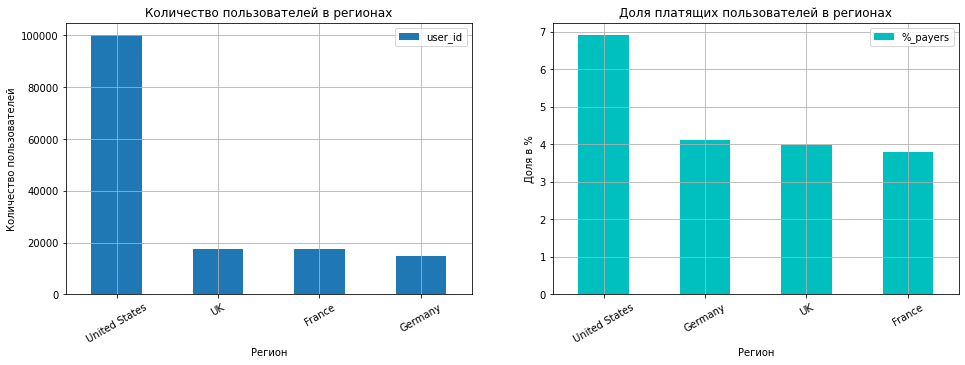

In [24]:
plt.figure(figsize=(16, 5))

ax1 = plt.subplot(1, 2, 1)
profiles_region.sort_values(by='user_id', ascending=False).plot.bar(
                                                           x='region', y=['user_id'], grid=True,
                                                           title='Количество пользователей в регионах', 
                                                           rot=30, ax=ax1).set(xlabel='Регион', 
                                                                               ylabel='Количество пользователей')

ax2 = plt.subplot(1, 2, 2)
profiles_region.sort_values(by='%_payers', ascending=False).plot.bar(
                                                             x='region', y=['%_payers'], grid=True,
                                                             title='Доля платящих пользователей в регионах',
                                                             rot=30, color='c',ax=ax2).set(xlabel='Регион', 
                                                                                           ylabel='Доля в %')

plt.show()

<b>Вывод:</b> \
 Большая часть пользователей приложения - из США (66%), оставшаяся доля приходится почти поровну на пользователей Великобритании, Франции и Германии. Доля платящих пользователей также выше в США:  6,9% против 4%(+/-) в остальных странах.

#### <b>Анализ устройств пользователей

Сгруппируем профили по устройствам и подсчитаем общее количество пользователей и количество платящих из них, чтобы узнать с каких устройств пользователи заходят в приложение. 

In [25]:
profiles_device = (
    profiles.groupby('device')['user_id', 'payer']
    .agg({'user_id': 'count', 'payer':'sum'}).reset_index()
)
profiles_device['%_payers'] = round(profiles_device['payer'] / profiles_device['user_id'] * 100, 2)
profiles_device.sort_values(by='payer', ascending=False)

,device,user_id,payer,%_payers
3,iPhone,54479,3382,6.21
0,Android,35032,2050,5.85
1,Mac,30042,1912,6.36
2,PC,30455,1537,5.05


<b>Теперь визуализируем результат:

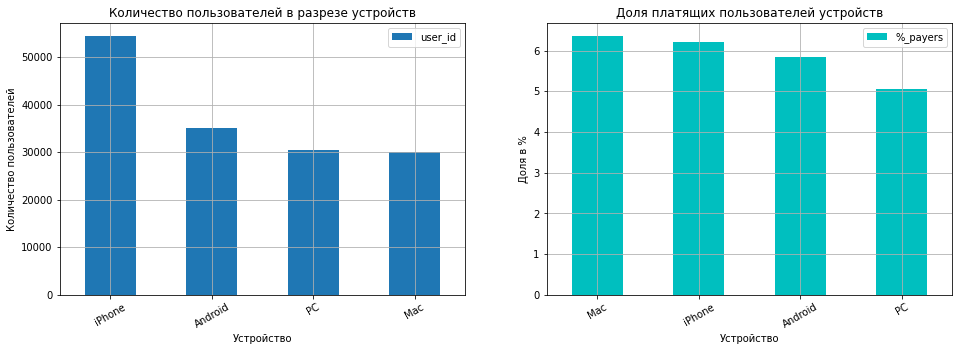

In [26]:
plt.figure(figsize=(16, 5))

ax1 = plt.subplot(1, 2, 1)
profiles_device.sort_values(by='user_id', ascending=False).plot.bar(
                                                           x='device', y=['user_id'], grid=True,
                                                           title='Количество пользователей в разрезе устройств', 
                                                           rot=30, ax=ax1).set(xlabel='Устройство', 
                                                                               ylabel='Количество пользователей')

ax2 = plt.subplot(1, 2, 2)
profiles_device.sort_values(by='%_payers', ascending=False).plot.bar(
                                                             x='device', y=['%_payers'], grid=True,
                                                             title='Доля платящих пользователей устройств',
                                                             rot=30,color='c', ax=ax2).set(xlabel='Устройство', 
                                                                                           ylabel='Доля в %')

plt.show()

<b>Вывод:</b>                                                                                                              Больше всего пользователей заходят в приложение с iPhone (около 6 тыс.пользователей) против 3-5 тыс. пользователей других устройств, доля платящих находится на уровне 5-6.2% и максимальна у пользователей Mac.

#### Анализ рекламных каналов привлечения пользователей

Узнаем из каких рекламных источников приходят в приложение пользователи: сгруппируем профили по рекламному источнику, найдем общее количество и количество платящих пользователей каждого канала.

In [27]:
profiles_channel = (
    profiles.groupby('channel')['user_id', 'payer']
    .agg({'user_id': 'count', 'payer':'sum'}).reset_index()
)
# % пользователей каждого канала 
profiles_channel['%_users'] = round(profiles_channel['user_id'] / profiles_channel['user_id'].sum() * 100, 2)
# % платящих внутри канала
profiles_channel['%_payers'] = round(profiles_channel['payer'] / profiles_channel['user_id'] * 100, 2)

profiles_channel.sort_values(by='user_id', ascending=False)

,channel,user_id,payer,%_users,%_payers
10,organic,56439,1160,37.62,2.06
1,FaceBoom,29144,3557,19.43,12.20
6,TipTop,19561,1878,13.04,9.60
4,OppleCreativeMedia,8605,233,5.74,2.71
2,LeapBob,8553,262,5.70,3.06
7,WahooNetBanner,8553,453,5.70,5.30
5,RocketSuperAds,4448,352,2.97,7.91
3,MediaTornado,4364,156,2.91,3.57
8,YRabbit,4312,165,2.87,3.83
0,AdNonSense,3880,440,2.59,11.34


<b>Теперь визуализируем результат:

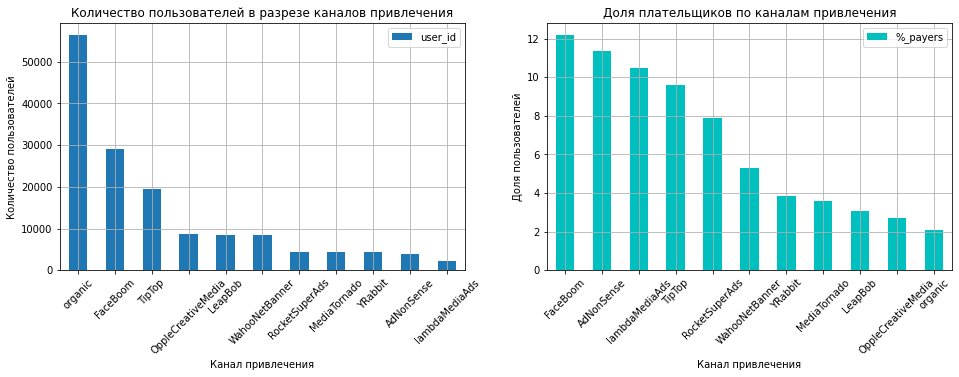

In [28]:
plt.figure(figsize=(16, 10))

ax1 = plt.subplot(2, 2, 1)
profiles_channel.sort_values(by='user_id', ascending=False).plot.bar(
                                                           x='channel', y=['user_id'],grid=True,
                                                           title='Количество пользователей в разрезе каналов привлечения', 
                                                           rot=45, ax=ax1).set(xlabel='Канал привлечения', 
                                                                               ylabel='Количество пользователей')
ax2 = plt.subplot(2, 2, 2)
profiles_channel.sort_values(by='%_payers', ascending=False).plot.bar(
                                                             x='channel', y=['%_payers'], grid=True,
                                                             title='Доля плательщиков по каналам привлечения',
                                                             rot=45, color='c', ax=ax2).set(xlabel='Канал привлечения', 
                                                                               ylabel='Доля пользователей')

plt.show()

<b>Вывод:</b> \
Более 56 тысяч пользователей находит приложение самостоятельно (канал "organic"), но доля платящих среди такиих пользователей- самая низкая (около 2%). Самые крупные платные рекламные источники -FaceBoom и TipTop, они дают компании 50% пользователей. По платящим пользователям, лидируют также FaceBoom (12.2%) и TipTop(9.6%), и два малоиспользуемых рекламных канала- AdNonSense (11.34%) и lambdaMediaAds (10.47%) 

<font size="4"><b> Вывод по разделу 3:</b></font>

Большая часть пользователей приложения - из США (66%), оставшаяся доля приходится почти поровну на пользователей Великобритании, Франции и Германии. Доля платящих пользователей также выше в США:  6,9% против 4%(+/-) в остальных странах. 

Что же касается устройст то больше всего пользователей заходят в приложение с iPhone (около 6 тыс.пользователей) против 3-5 тыс. пользователей других устройств, доля платящих находится на уровне 5-6.2% и максимальна у пользователей Mac. 

Относительно каналов пирвлечения получаем более 56 тысяч пользователей находит приложение самостоятельно (канал "organic"), но доля платящих среди такиих пользователей- самая низкая (около 2%). Самые крупные платные рекламные источники -FaceBoom и TipTop, они дают компании 50% пользователей. По платящим пользователям, лидируют также FaceBoom (12.2%) и TipTop(9.6%), и два малоиспользуемых рекламных канала- AdNonSense (11.34%) и lambdaMediaAds (10.47%)


### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Общая сумма расходов на маркетинг:

In [29]:
print('Общая сумма расходов на рекламу:', int(costs['costs'].sum()))

Общая сумма расходов на рекламу: 105497


#### Анализ затрат на каждый источник

Узнаем распределение суммы расходов на рекламу по источникам:

In [30]:
profiles_costs = costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs',ascending=False)
profiles_costs['%'] =round((profiles_costs['costs'] / profiles_costs['costs'].sum())*100, 2)
profiles_costs

,costs,%
channel,,
TipTop,54751.30,51.90
FaceBoom,32445.60,30.75
WahooNetBanner,5151.00,4.88
AdNonSense,3911.25,3.71
OppleCreativeMedia,2151.25,2.04
RocketSuperAds,1833.00,1.74
LeapBob,1797.60,1.70
lambdaMediaAds,1557.60,1.48
MediaTornado,954.48,0.90


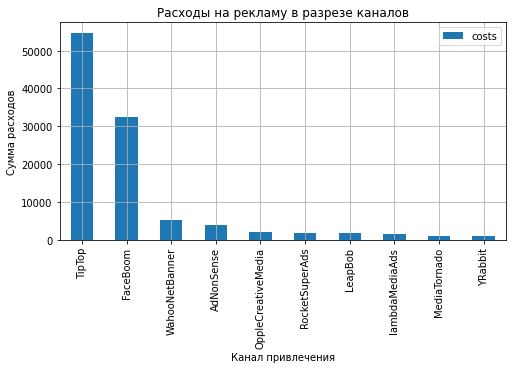

In [31]:
profiles_costs.plot.bar(y='costs',                        
                    grid=True,title='Расходы на рекламу в разрезе каналов',
                     figsize=(8,4)).set(ylabel='Сумма расходов', 
                     xlabel='Канал привлечения'
                      );

<b>Вывод:</b> Общая сумма затрат на маркетинг в период с 2019-05-01 по 2019-10-27 составила 105497 долл. Основная доля расходов направлена на рекламный каналы TipTop (51.9%) и FaceBoom (30.75%).

#### <b>Динамика расходов в разрезе каналов привлечения:

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
dt,,,,,,,,,,
2019-04-01,40.95,113.3,2.52,6.24,4.25,21.060,80.0,10.8,8.10,17.6
2019-05-01,1147.65,3625.6,151.20,236.64,181.25,571.545,3184.1,441.6,297.00,451.2
2019-06-01,534.45,5528.6,315.42,140.16,370.25,320.190,6779.9,930.6,106.02,196.8
2019-07-01,506.10,5247.0,311.64,138.00,362.75,249.340,8406.8,834.0,94.68,218.4
2019-08-01,583.80,6300.8,369.39,153.36,443.25,254.215,11208.0,1050.6,125.16,221.6
2019-09-01,577.50,6152.3,344.82,145.92,428.25,221.000,13371.0,987.0,156.09,244.8
2019-10-01,520.80,5478.0,302.61,134.16,361.25,195.650,11721.5,896.4,157.17,207.2


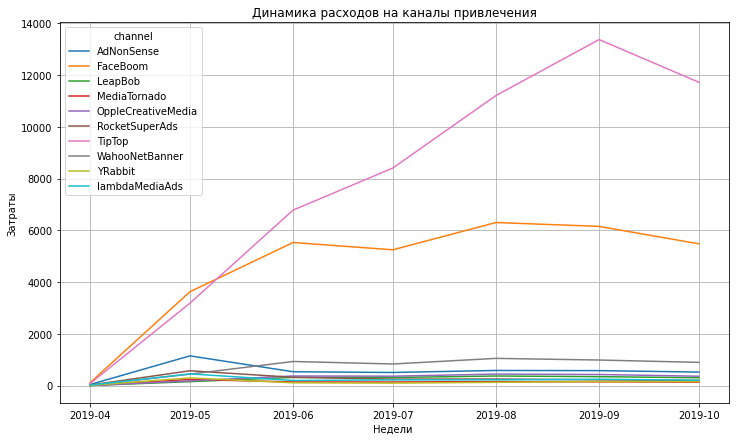

In [58]:
#costs['dt'] = pd.to_datetime(costs['dt']) - pd.to_timedelta(30, unit='m')

pivot_channel = costs.pivot_table(
        #index='dt', columns='channel', values='costs', aggfunc='sum' #ПО ДНЯМ
        #index=costs['dt'].dt.week, columns='channel', values='costs', aggfunc='sum' #ПО НЕДЕЛЯМ
        index=costs['dt'].astype('datetime64[M]').dt.date, columns='channel', values='costs', aggfunc='sum' #ПО МЕСЯЦАМ
    )
display(pivot_channel)
pivot_channel.plot(                                             
           figsize=(12, 7),
           grid=True,)

plt.title('Динамика расходов на каналы привлечения')
plt.xlabel('Недели ') #ДНИ, НЕДЕЛИ, МЕСЯЦЫ
plt.ylabel('Затраты')
plt.show()


<b>Вывод:</b> Затраты на маркетинг со временем возрастали в течение всего исследуемого периода только на двух каналах: *TipTop и FaceBoom*, тогда как остальные каналы привлечения постоянны, а уровень их гораздо ниже.

#### Средняя стоимость привлечения одного покупателя

Рассчитаем среднюю стоимость привлечения пользователя по проекту и на каждом канале. Для этого сгруппируем данные по столбцу acquisition_cost в профиле клиента.

<b>Расчет среднего САС на одного пользователя

Исключим из расчета пользователей organic и посчитаем среднее по всем каналам:

In [33]:
print('Средний САС по всем пользователям платных каналов:', \
      round(profiles.query('channel != "organic"')['acquisition_cost'].mean(), 2))

Средний САС по всем пользователям платных каналов: 1.13


<b>Расчет среднего САС на одного пользователя каждого канала:

In [34]:
#с группируем данные профилей клиентов по каналам привлечения и считаем среднее САС по каждому каналу
mean_cost_of_channel = profiles.query('channel != "organic"').groupby('channel')['acquisition_cost'] \
                                       .mean().sort_values(ascending=False)
print(round(mean_cost_of_channel, 2)) 

channel
TipTop                2.80
FaceBoom              1.11
AdNonSense            1.01
lambdaMediaAds        0.72
WahooNetBanner        0.60
RocketSuperAds        0.41
OppleCreativeMedia    0.25
YRabbit               0.22
MediaTornado          0.22
LeapBob               0.21
Name: acquisition_cost, dtype: float64


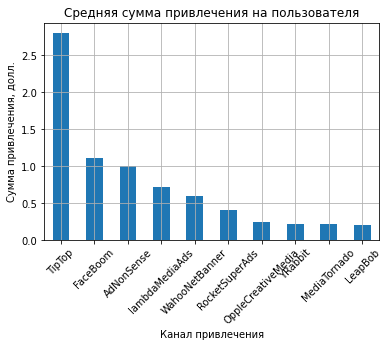

In [35]:
mean_cost_of_channel.plot.bar(
                         grid=True, rot=45, title='Средняя сумма привлечения на пользователя').set(
                         xlabel='Канал привлечения', ylabel='Сумма привлечения, долл.');

<b>Вывод:</b> Средний CAC для всего проекта составляет - 1.13. \
Самыми дорогими трафиками вышли TipTop (2.8), FaceBoom (1.11), AdNonSense(1.01). \
Можно рекомендовать сократить расходы на трафик TipTop



<font size="4"><b> Вывод по разделу 4:</b></font>

Общая сумма затрат на маркетинг в период с 2019-05-01 по 2019-10-27 составила 105497 долл. Основная доля расходов направлена на рекламный каналы TipTop (51.9%) и FaceBoom (30.75%). 

Затраты на маркетинг со временем возрастали в течение всего исследуемого периода только на двух каналах: *TipTop и FaceBoom*, тогда как остальные каналы привлечения постоянны, а уровень их гораздо ниже. 

Средний CAC для всего проекта составляет - 1.13. \
Самыми дорогими трафиками вышли TipTop (2.8), FaceBoom (1.11), AdNonSense(1.01). \
Можно рекомендовать сократить расходы на трафик TipTop


### Оценка окупаемости рекламы



Чтобы выяснить причины низкой окупаемости рекламы рассчитаем LTV, ROI, а также коэффициенты конверсии и удержания пользователей.
Моментом наблюдения установим 01.11.2019, а горизонт анализа равным 14 дням.
Ограничим наши исследования пользователями, пришедшими на сайт из рекламных каналов, т.е. удалим пользователей 'organic'.

In [36]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

print('Количество всех профилей:', len(profiles))
profiles = profiles.query('channel != "organic"')
print('Количество профилей без "organic":', len(profiles))

Количество всех профилей: 150008
Количество профилей без "organic": 93569


<font size="3"><b>5.1 Общая окупаемость рекламы<b></font>

Впервую очередь оценим общую окупаемость рекламы. Рассчитаем и визуализируем LTV и ROI. 

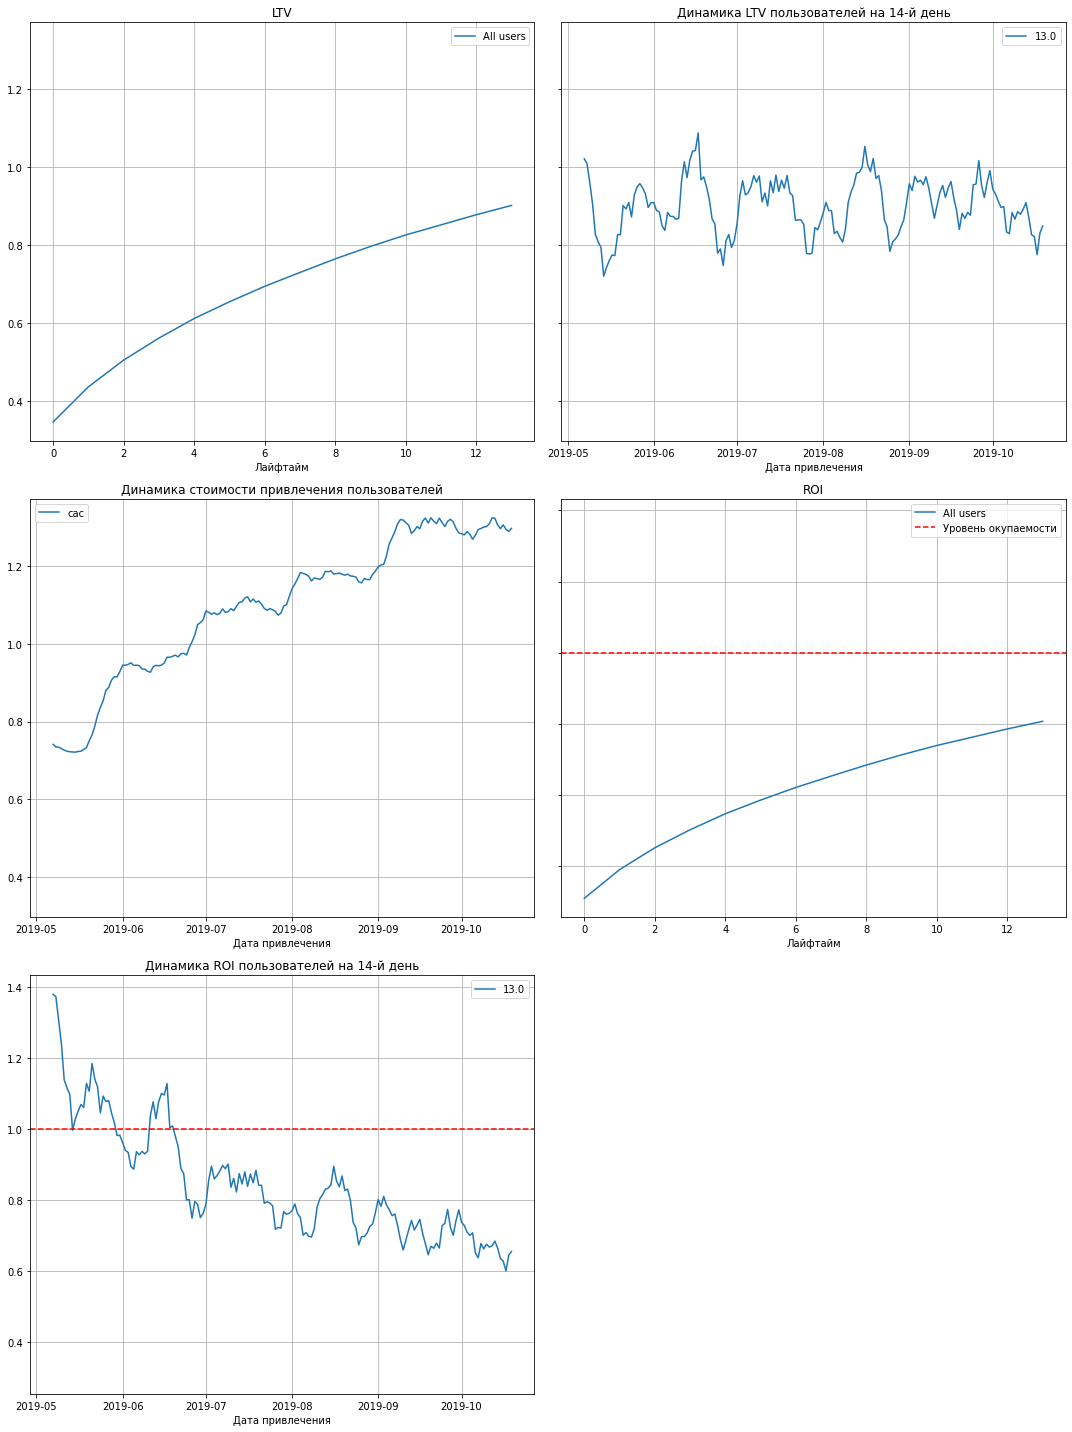

In [37]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

<font size="3"><b>Вывод общая окупаемость рекламы п.5.1</b></font>

1.LTV держится на примерно одном уровне на протяжении всего эксперимента. \
2.CAC на протяжении всего эксперимента растёт. \
3.ROI не доходит до уровня окупаемости. \
4.Пользователи перестают окупаться уже в июне.

<font size="4"><b>5.2 Окупаемость рекламы с разбивкой<b></font>

<font size="3"><b>5.2.1 Окупаемость рекламы с разбивкой по устройствам<b></font>

Рассмотрим те же показатели в разрезе устройств:

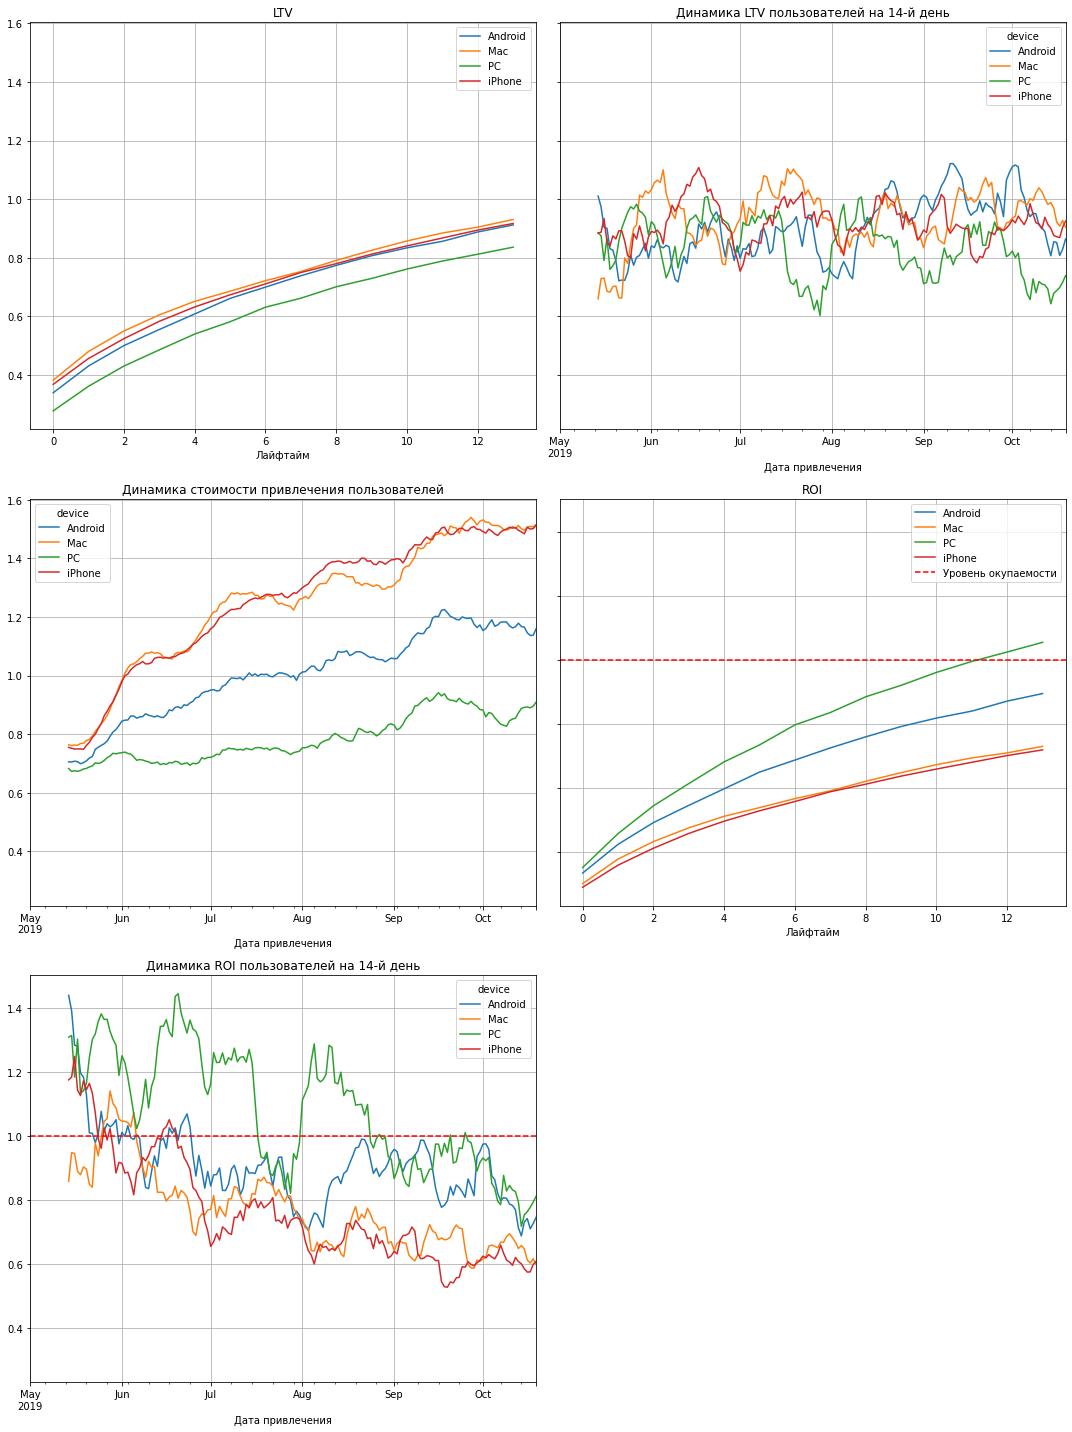

In [38]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

<b>Вывод:</b> \
Не окупаются пользователи всех девайсов: незначительно порог окупаемости переходят только пользователи PC (динамика их ROI также падает). На всех девайсах растет стоимость привлечения. Самые "неокупаемые" владельцы устройств на IOS и Mac.  

<font size="3"><b>5.2.2 Окупаемость рекламы с разбивкой по странам<b></font>

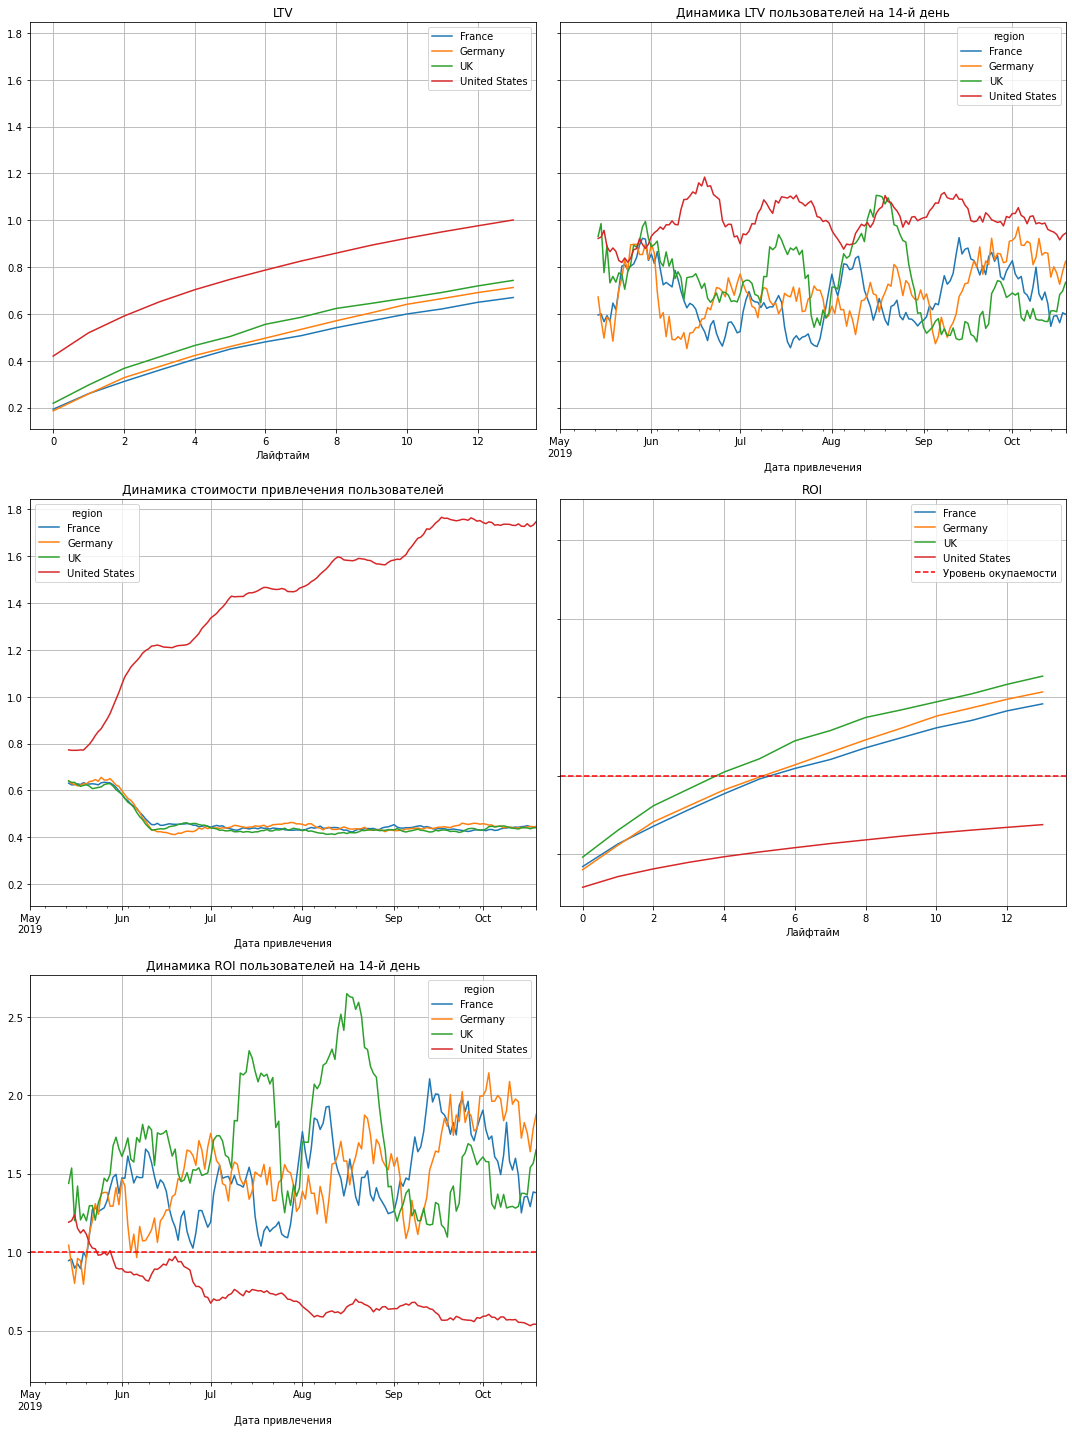

In [39]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

<b>Вывод:</b> \
На графиках видно из общей картины выделяются США.
У них наибольший LTV, но расходы на рекламу тоже постоянно растут - с 1-го доллара выручки с пользователя получаем расходы на его привлечение около 1,75 доллара. США единственная страна, где уровень окупаемости рекламы ниже допустимого порога в 100% на рекламу (ROI упал до 50%). 
Рынок США составляет более 65% от общей массы пользователей, убытки от привлечения пользователей страны полностью перекрывают доходы окупаемых стран (у остальных регионов САС стабилен, маркетинговые расходы окупаются за неделю).

<font size="3"><b>5.2.3 Окупаемость рекламы с разбивкой по рекламным каналам<b></font>

<b>А. Рынок США

Рассмотрим рекламные каналы американского рынка отдельно, так как проблемы с неокупаемостью только здесь.

In [40]:
#выделим профили пользователей США
profiles_usa = profiles.query('region == "United States"')
print(len(profiles_usa))

61829


Найдем каналы, которые используются в США и их долю на общем страновом рынке:

In [41]:
#считаем количество пользователей США в разбивке по рекламным каналам
profiles_channel_usa = (
    profiles_usa.groupby('channel')['user_id']
    .count().reset_index()
)
#добавляем количество пользователей этих рекламных каналов во всех регионах
profiles_channel_usa.merge(profiles_channel[['channel', 'user_id']], on='channel').rename(
                                   columns={'user_id_x':'user_usa', 'user_id_y':'user_all'}
                                   ).sort_values(by='user_usa', ascending=False)

,channel,user_usa,user_all
0,FaceBoom,29144,29144
3,TipTop,19561,19561
2,RocketSuperAds,4448,4448
1,MediaTornado,4364,4364
4,YRabbit,4312,4312


Рекламные каналы США используются только у них.

Рассчитаем окупаемость рекламы на американском рынке с разбивкой по источникам привлечения:

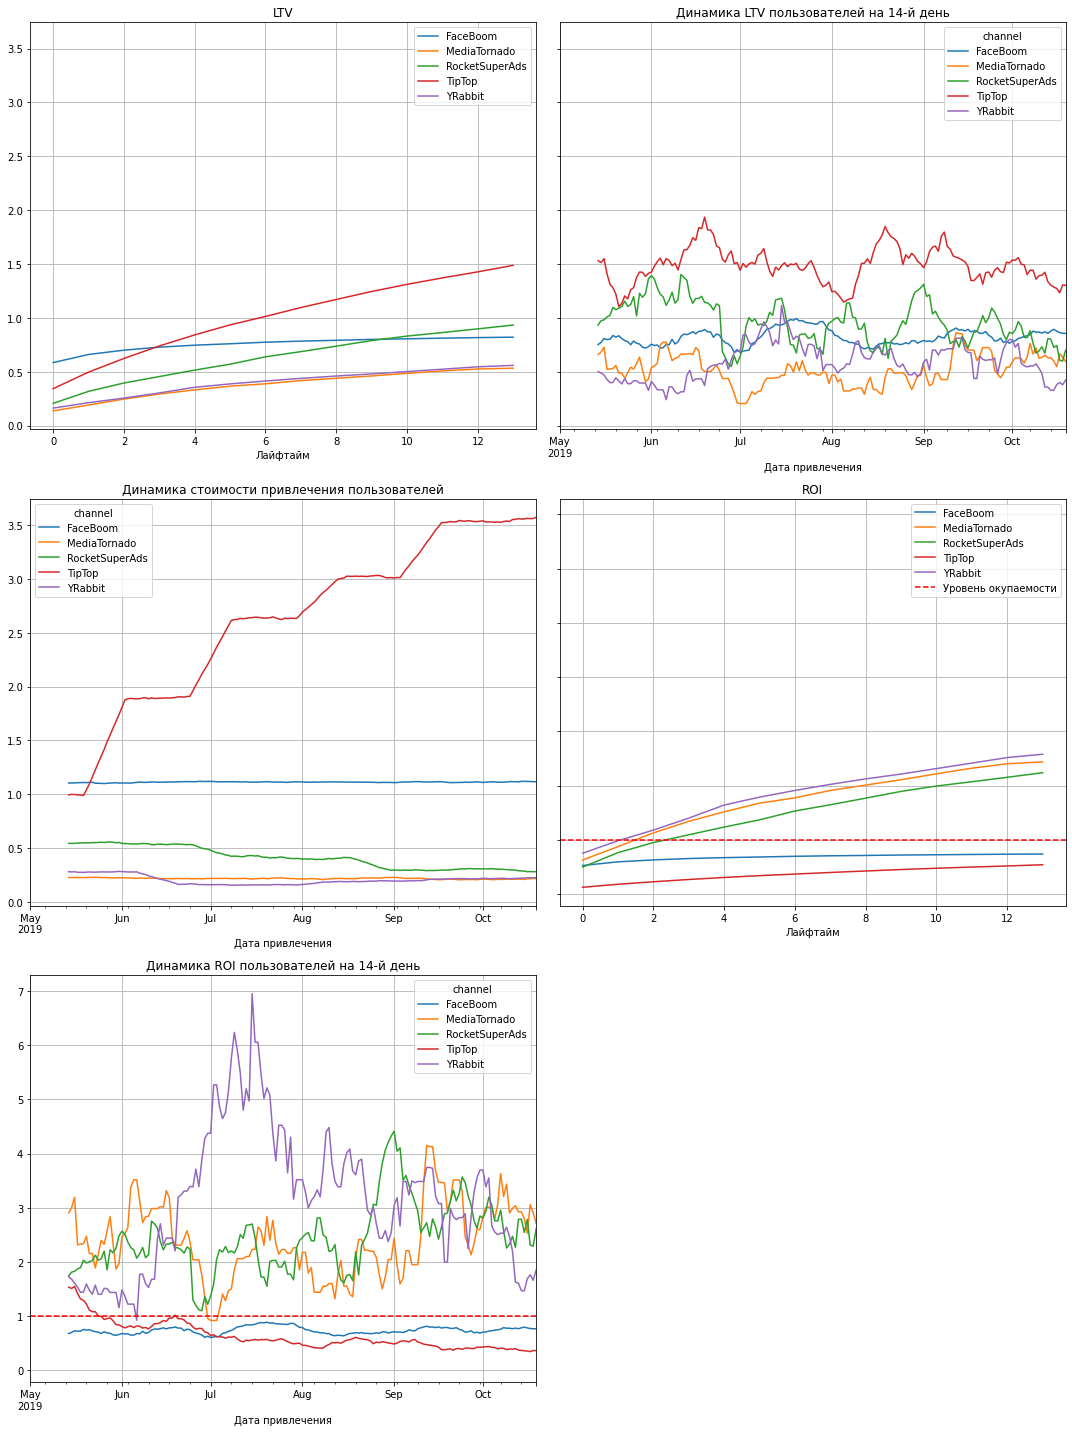

In [42]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)


<b>Вывод:</b> \
В США убыточны пользователи, которые пришли в приложение из TipTop и FaceBoom.

TipTop показывает самый высокий и стабильный в динамике LTV, но и САС постоянно растет, в результате на каждые 1,5 доллара, полученные от покупателей, тратится на привлечение 3,5 доллара, ROI не поднимается выше 50%.

FaceBoom также стабильно убыточен, самый значительный рост его LTV происходит в первые два дня, и хотя он выше нескольких других каналов, а его САС находится на постоянном уровне (около 1,1 долл.), он все-таки недостаточен для окупаемости и находится на уровне 80%.

Получается убыточными оказались вложения только в реклама в США.

<b>Б. Рынок Европы

Изучим европейский рынок:

In [43]:
profiles_eur  = profiles.query('region != "United States"')

Смотрим количество пользователей в разбивке по рекламным каналам:

In [44]:
profiles_eur.groupby('channel')['user_id'].count().reset_index()

,channel,user_id
0,AdNonSense,3880
1,LeapBob,8553
2,OppleCreativeMedia,8605
3,WahooNetBanner,8553
4,lambdaMediaAds,2149


Рассчитаем окупаемость рекламы в еропе с разбивкой по источникам привлечения:

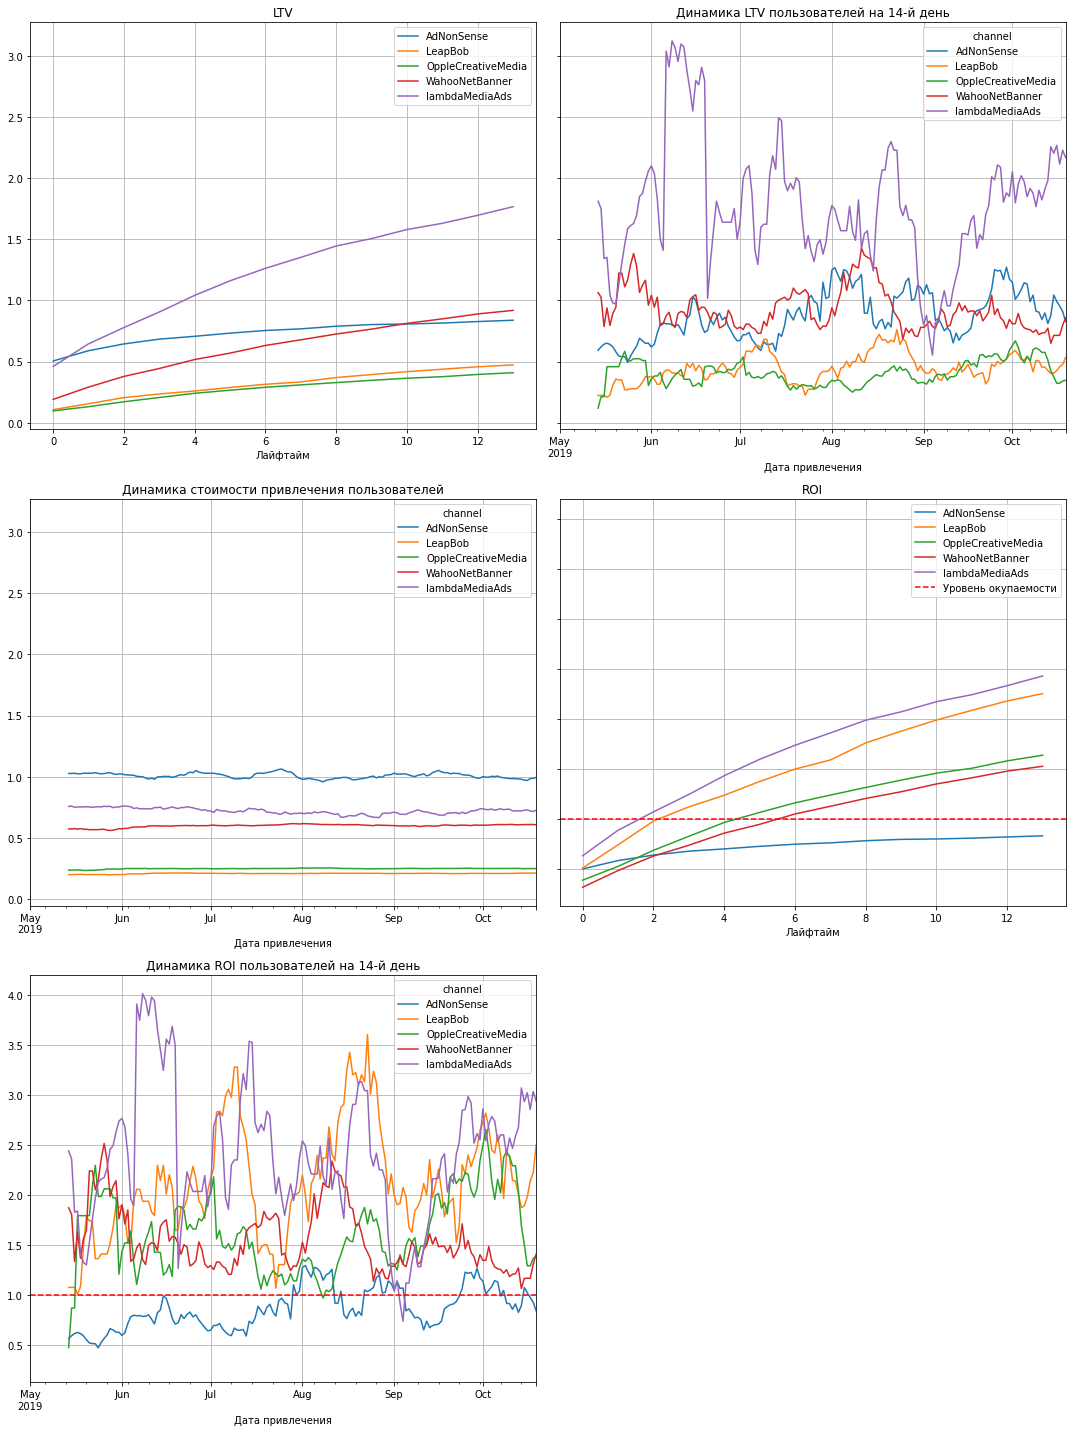

In [45]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_eur, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

<b>Вывод:</b> 

В Европе полохими показателями выделяется только канал AdNonSense (LTV 0.7 дол, САС 1 дол, ROI к концу второй недели- 70%).

Каналы с хорошей окупаемостью, уровня которой они достигают за 2 дня: LeapBob и lambdaMediaAds.

<font size="3"><b>Вывод по окупаемости рекламы с разбивкой п.5.2<b></font>

Не окупаются пользователи всех девайсов: незначительно порог окупаемости переходят только пользователи PC (динамика их ROI также падает). На всех девайсах растет стоимость привлечения. Самые "неокупаемые" владельцы устройств на IOS и Mac. 

На графиках видно из общей картины выделяются США.
У них наибольший LTV, но расходы на рекламу тоже постоянно растут - с 1-го доллара выручки с пользователя получаем расходы на его привлечение около 1,75 доллара. США единственная страна, где уровень окупаемости рекламы ниже допустимого порога в 100% на рекламу (ROI упал до 50%). 
Рынок США составляет более 65% от общей массы пользователей, убытки от привлечения пользователей страны полностью перекрывают доходы окупаемых стран (у остальных регионов САС стабилен, маркетинговые расходы окупаются за неделю). Убыточны пользователи, которые пришли в приложение из TipTop и FaceBoom.

TipTop показывает самый высокий и стабильный в динамике LTV, но и САС постоянно растет, в результате на каждые 1,5 доллара, полученные от покупателей, тратится на привлечение 3,5 доллара, ROI не поднимается выше 50%.
FaceBoom также стабильно убыточен, самый значительный рост его LTV происходит в первые два дня, и хотя он выше нескольких других каналов, а его САС находится на постоянном уровне (около 1,1 долл.), он все-таки недостаточен для окупаемости и находится на уровне 80%.

В Европе полохими показателями выделяется только канал AdNonSense (LTV 0.7 дол, САС 1 дол, ROI к концу второй недели- 70%).
Каналы с хорошей окупаемостью, уровня которой они достигают за 2 дня: LeapBob и lambdaMediaAds.

В итоге убыточными оказались вложения только в рекламу США.

<font size="4"><b>5.3 Расчет конверсии и удержания<b></font>

<font size="3"><b>5.3.1 Конверсия и удержание с разбивкой по устройствам <b></font>

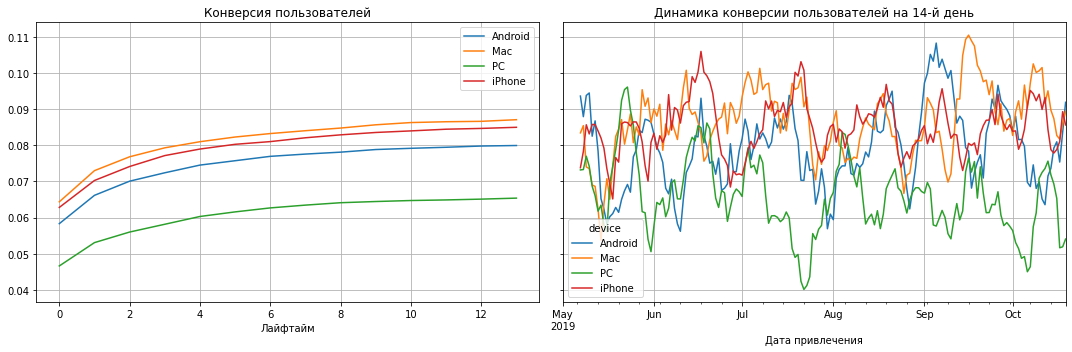

In [46]:
# смотрим конверсию
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

В общем пользователи Mac, iPhone и Android конвертируются лучше PC, так же видны "сезонные" провалы у всех устройств. Каких-либо особенностей у пользователей конкретного вида устройств не наблюдается.

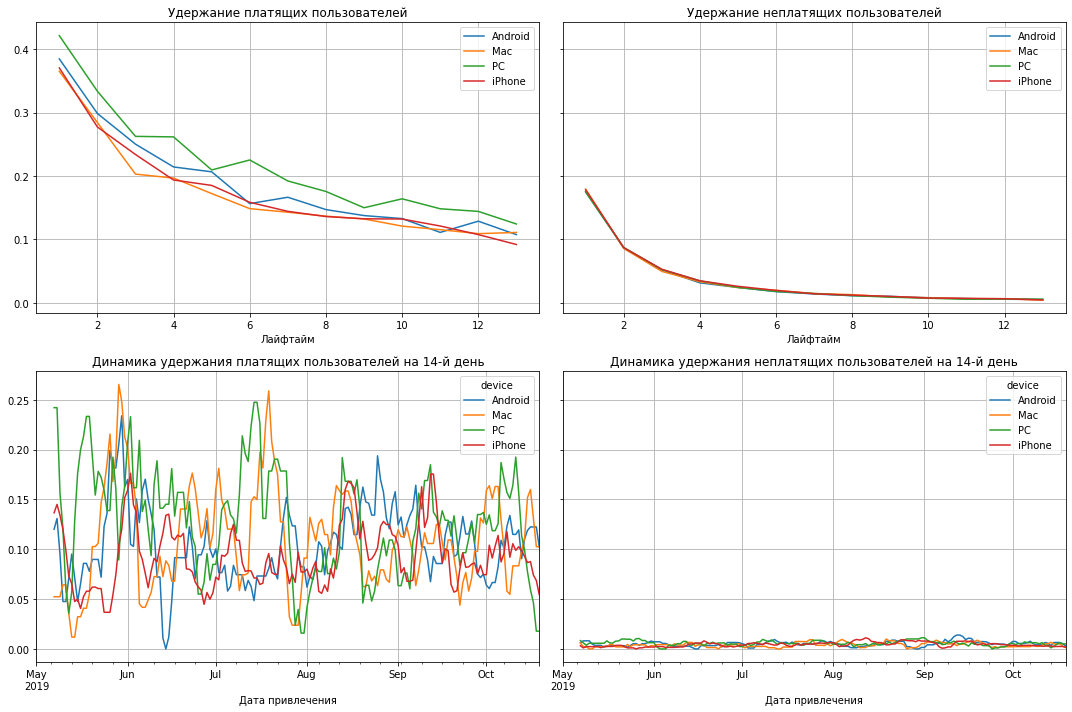

In [47]:
# смотрим удержание 

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Удержание немного выше у пользователей PC, но в целом также нет каких-либо особенностей.

<b>Вывод:</b> 

В целом пользователи Mac, iPhone и Android конвертируются лучше PC, также можно заметить "сезонные" провалы у всех устройств. Удержание незначительно выше у пользователей PC, но в целом нет каких-либо особенностей, которые бы указывали на то, что тип устройства может быть причиной низкой окупаемости.
    

<font size="3"><b>5.3.2 Конверсия и удержание с разбивкой по странам <b></font>

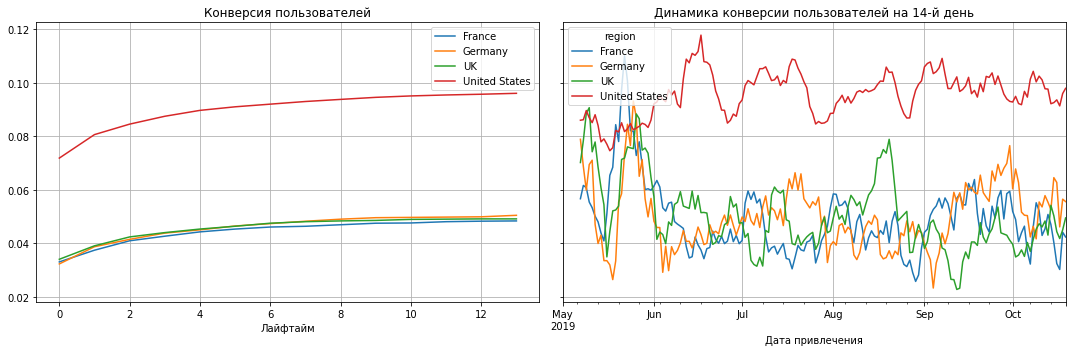

In [48]:
# смотрим конверсию 
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия пользователей США в 2 раза выше , чем у пользователей других регионов, динамика конверсии на 14-й день также стабильна.

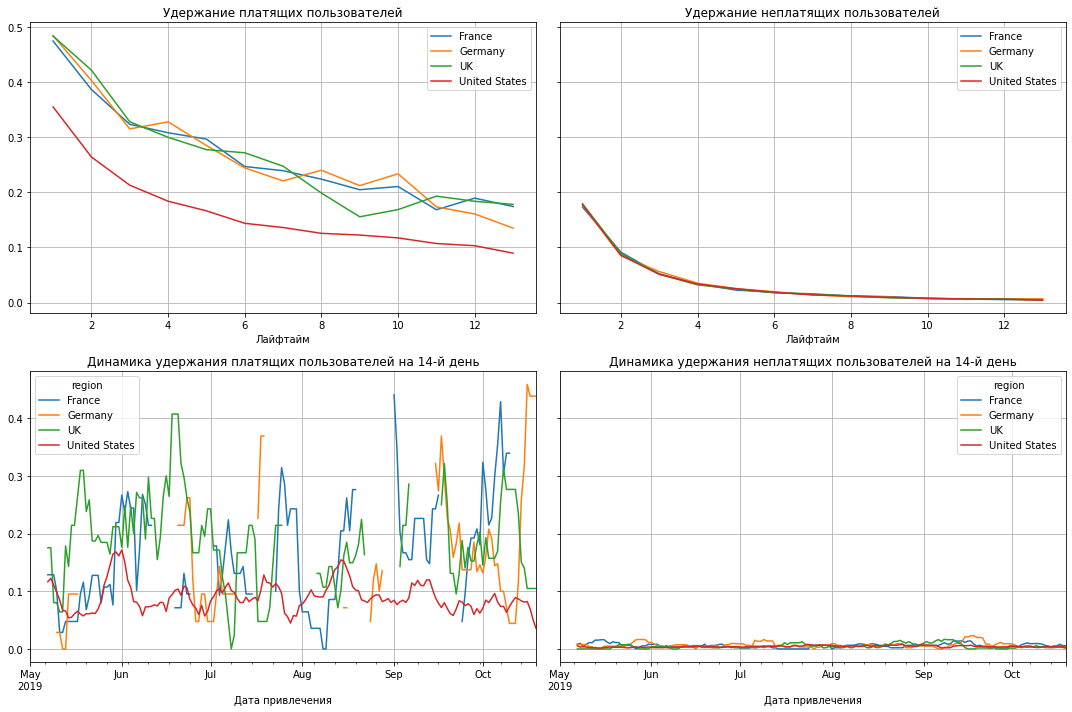

In [49]:
# смотрим удержание 
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Коэффициент удержания платящих пользователей из США напорядок ниже, чем в остальных странах, т.е. при высокой конверсии покупатели США быстро уходят с сайта.

<b>Вывод:</b> \
Конверсия пользователей США в 2 раза выше , чем у пользователей других регионов, но коэффициент удержания у платящих пользователей из США явно ниже, чем в остальных странах. То есть при высокой конверсии покупатели США быстро уходят с сайта.

<font size="3"><b>5.3.3 Конверсия и удержание с разбивкой по рекламным каналам<b></font>

<b>А. Рынок США

Рассмотрим рекламные каналы американского рынка отдельно, так как проблемы с неокупаемостью только здесь.

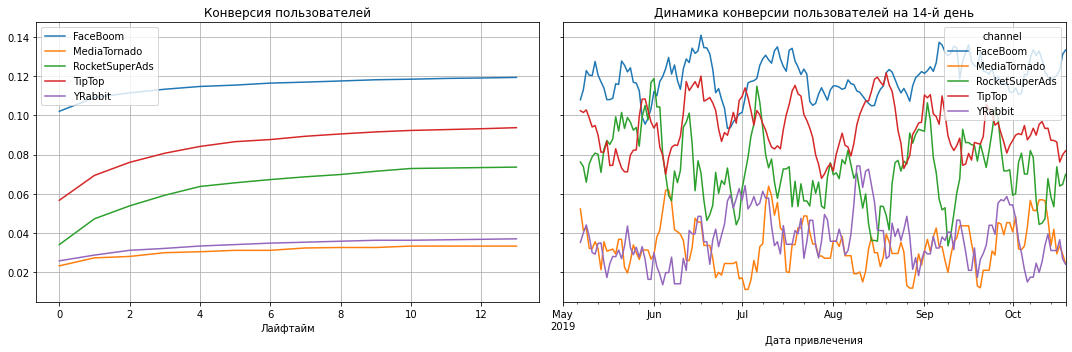

In [50]:
# смотрим конверсию 
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)


Видим, что самая высокая конверсия в США у пользователей FaceBoom и TipTop.

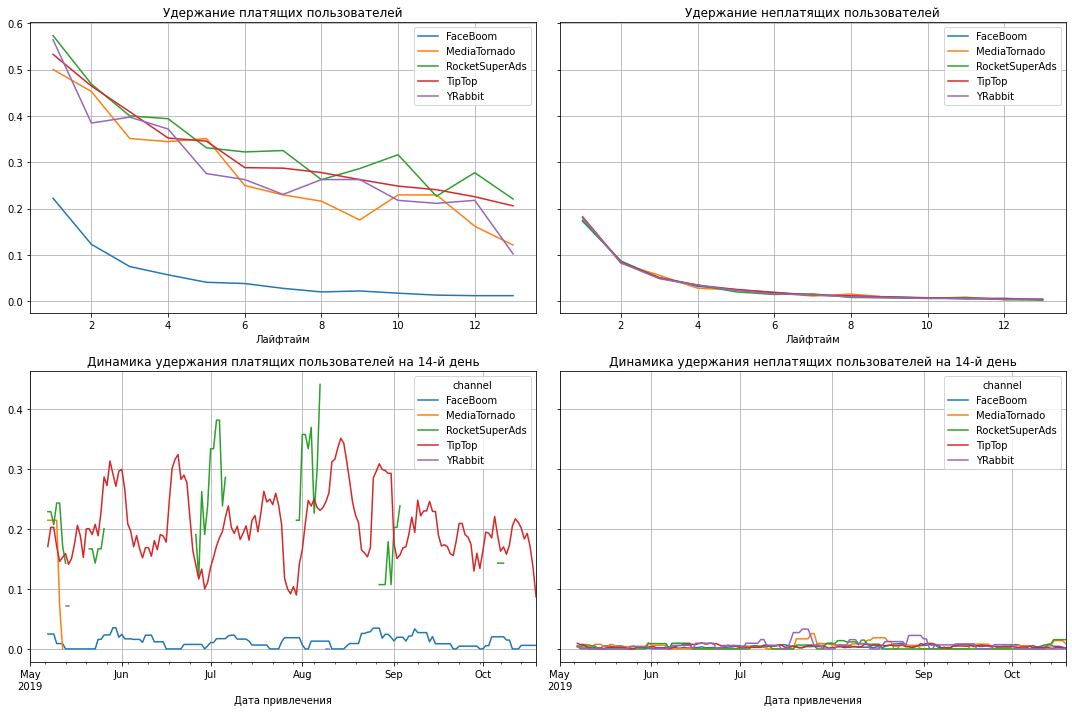

In [51]:
# смотрим удержание
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_usa, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Самое низкое удержание платящих пользователей у пришедших с FaceBoom: к концу второй недели оно стремится к нулю, изначально принимая значение не более 22%. 

Удержание TipTop в среднем находится на общем уровне с другими каналами привлечения: за 2 недели изменяется с 55% до 20%.

<b>Б. Рынок Европы

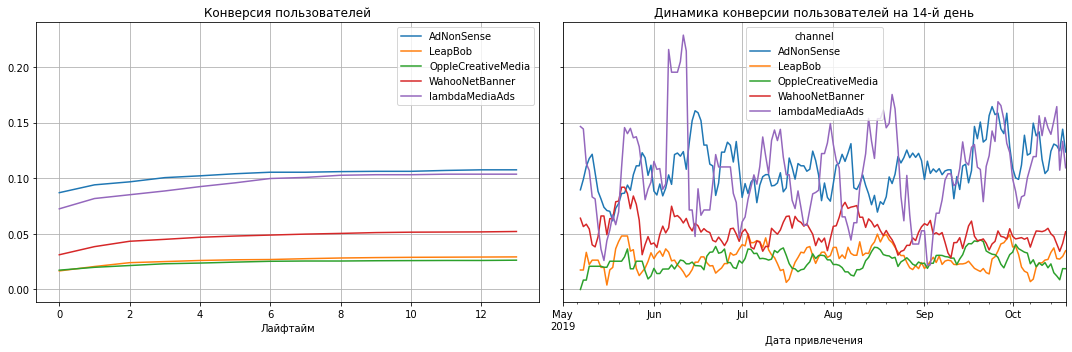

In [52]:
# смотрим конверсию 
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_eur, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Самая высокая конверсия у каналов AdNonSense и lambdaMediaAds. 

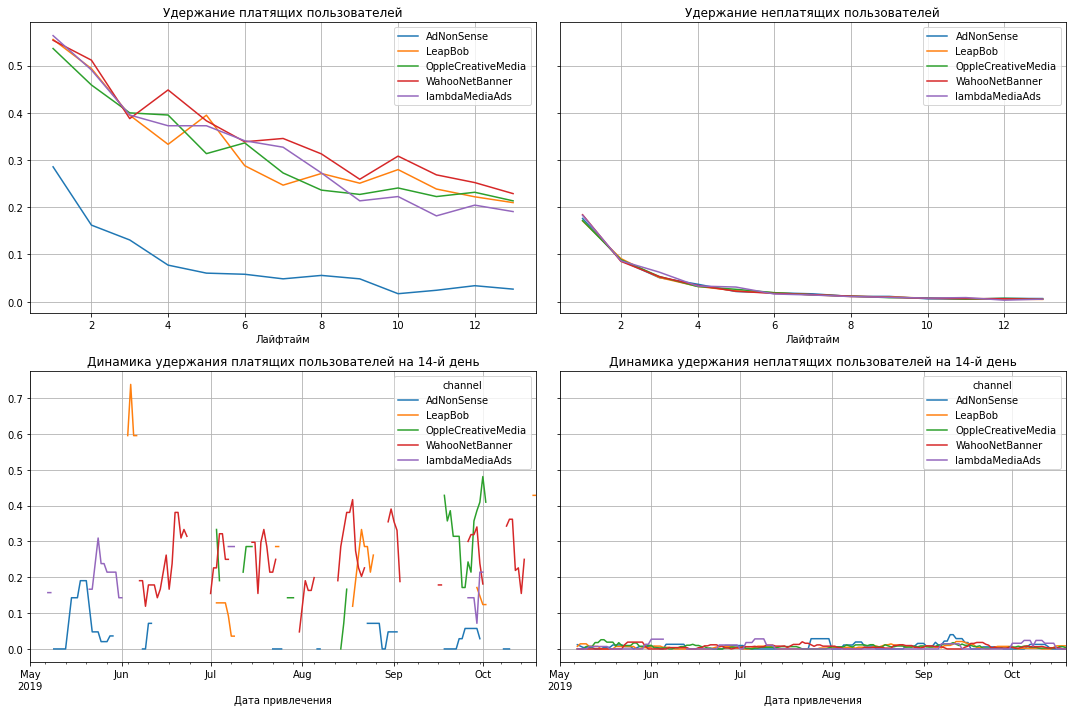

In [53]:
# смотрим удержание 
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_eur, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Канал AdNonSense показывает низкое по сравнению с остальными удержание платящих пользователей при уровне конверсии выше других. Остальные каналы показывают примерно схожие результаты.

<font size="3"><b>Вывод по конверсии и удержанию п. 5.3 <b></font>

В целом пользователи Mac, iPhone и Android конвертируются лучше PC, также можно заметить "сезонные" провалы у всех устройств. Удержание незначительно выше у пользователей PC, но в целом нет каких-либо особенностей, которые бы указывали на то, что тип устройства может быть причиной низкой окупаемости.

Конверсия пользователей США в 2 раза выше , чем у пользователей других регионов, но коэффициент удержания у платящих пользователей из США явно ниже, чем в остальных странах. То есть при высокой конверсии покупатели США быстро уходят с сайта.
Видим, что самая высокая конверсия в США у пользователей FaceBoom и TipTop.
Самое низкое удержание платящих пользователей у пришедших с FaceBoom: к концу второй недели оно стремится к нулю, изначально принимая значение не более 22%. 
Удержание TipTop в среднем находится на общем уровне с другими каналами привлечения: за 2 недели изменяется с 55% до 20%.


В Европе высокая конверсия у каналов AdNonSense и lambdaMediaAds. Канал AdNonSense показывает низкое по сравнению с остальными удержание платящих пользователей при уровне конверсии выше других. Остальные каналы показывают примерно схожие результаты.

    

<font size="4"><b>Вывод - оценка окупаемости рекламы п.5<b></font>

При анализе данных мы видим проблему динамика LTV условно-стабильна (уровень LTV к концу второй недели привлечения примерно одинаков на всем промежутке исследуемого периода), а динамика расходов по их привлечению (САС) постоянно растет, что повлекло за собой снижение окупаемости :к середине июля ROI окончательно опустился ниже предельного уровня (100%). Реклама не окупается к концу второй недели и дотягивает только до уровня 80%, что идет вразрез с бизнес-планом.

Не окупаются пользователи всех девайсов: незначительно порог окупаемости переходят только пользователи PC (динамика их ROI также падает). На всех девайсах растет стоимость привлечения. Самые "неокупаемые" владельцы устройств на IOS и Mac. 

На графиках видно из общей картины выделяются США.
У них наибольший LTV, но расходы на рекламу тоже постоянно растут - с 1-го доллара выручки с пользователя получаем расходы на его привлечение около 1,75 доллара. США единственная страна, где уровень окупаемости рекламы ниже допустимого порога в 100% на рекламу (ROI упал до 50%). 
Рынок США составляет более 65% от общей массы пользователей, убытки от привлечения пользователей страны полностью перекрывают доходы окупаемых стран (у остальных регионов САС стабилен, маркетинговые расходы окупаются за неделю). Убыточны пользователи, которые пришли в приложение из TipTop и FaceBoom.
TipTop показывает самый высокий и стабильный в динамике LTV, но и САС постоянно растет, в результате на каждые 1,5 доллара, полученные от покупателей, тратится на привлечение 3,5 доллара, ROI не поднимается выше 50%.
FaceBoom также стабильно убыточен, самый значительный рост его LTV происходит в первые два дня, и хотя он выше нескольких других каналов, а его САС находится на постоянном уровне (около 1,1 долл.), он все-таки недостаточен для окупаемости и находится на уровне 80%.
В Европе полохими показателями выделяется только канал AdNonSense (LTV 0.7 дол, САС 1 дол, ROI к концу второй недели- 70%).
Каналы с хорошей окупаемостью, уровня которой они достигают за 2 дня: LeapBob и lambdaMediaAds.

В итоге убыточными оказались вложения только в рекламу США.

Конверсия пользователей США в 2 раза выше , чем у пользователей других регионов, но коэффициент удержания у платящих пользователей из США явно ниже, чем в остальных странах. То есть при высокой конверсии покупатели США быстро уходят с сайта.
Видим, что самая высокая конверсия в США у пользователей FaceBoom и TipTop.
Самое низкое удержание платящих пользователей у пришедших с FaceBoom: к концу второй недели оно стремится к нулю, изначально принимая значение не более 22%. 
Удержание TipTop в среднем находится на общем уровне с другими каналами привлечения: за 2 недели изменяется с 55% до 20%.
В Европе картина гораздо лучше - высокая конверсия у каналов AdNonSense и lambdaMediaAds. Канал AdNonSense показывает низкое по сравнению с остальными удержание платящих пользователей при уровне конверсии выше других. Остальные каналы показывают примерно схожие результаты.
В целом пользователи Mac, iPhone и Android конвертируются лучше PC, также можно заметить "сезонные" провалы у всех устройств. Удержание незначительно выше у пользователей PC, но в целом нет каких-либо особенностей, которые бы указывали на то, что тип устройства может быть причиной низкой окупаемости.
    



### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.


<font size="4"><b>Выводы и рекомендации:</b></font>

Представленные для анализа данные содержат информацию о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, сведениях об их покупках за этот период, а также статистика рекламных расходов. В результате предобработки данных исправлены нарушения стиля в наименовании столбцов и устранено несоотвествие типа данных в столбцах, в которых обозначена дата: с типа object на datetime.

Для проведения анализа были сформированы 150008 уникальных профилей пользователей, включающих user_id, дату и месяц первого посещения сайта, канал привлечения, устройство, признак плательщика и средние расходы на привлечение одного пользователя, рассчитанные по каждой когорте, за период привлечения с мая по октябрь 2019 г. включительно.

<b>Результаты анализа:

Большая часть пользователей приложения - из США (66%), оставшаяся доля приходится почти поровну на пользователей Великобритании, Франции и Германии. Доля платящих пользователей также выше в США:  6,9% против 4%(+/-) в остальных странах. 

Что касается устройств, то больше всего пользователей заходят в приложение с iPhone (около 6 тыс.пользователей) против 3-5 тыс. пользователей других устройств, доля платящих находится на уровне 5-6.2% и максимальна у пользователей Mac. 

Относительно каналов пирвлечения получаем более 56 тысяч пользователей находит приложение самостоятельно (канал "organic"), но доля платящих среди такиих пользователей- самая низкая (около 2%). Самые крупные платные рекламные источники -FaceBoom и TipTop, они дают компании 50% пользователей. По платящим пользователям, лидируют также FaceBoom (12.2%) и TipTop(9.6%), и два малоиспользуемых рекламных канала- AdNonSense (11.34%) и lambdaMediaAds (10.47%)



Общая сумма затрат на маркетинг в период с 2019-05-01 по 2019-10-27 составила 105497 долл. Основная доля расходов направлена на рекламный каналы TipTop (51.9%) и FaceBoom (30.75%). 
Затраты на маркетинг со временем возрастали в течение всего исследуемого периода только на двух каналах: *TipTop и FaceBoom*, тогда как остальные каналы привлечения постоянны, а уровень их гораздо ниже. 
Средний CAC для всего проекта составляет - 1.13. \
Самыми дорогими трафиками вышли TipTop (2.8), FaceBoom (1.11), AdNonSense(1.01). \


При анализе данных мы видим проблему динамика LTV условно-стабильна (уровень LTV к концу второй недели привлечения примерно одинаков на всем промежутке исследуемого периода), а динамика расходов по их привлечению (САС) постоянно растет, что повлекло за собой снижение окупаемости :к середине июля ROI окончательно опустился ниже предельного уровня (100%). Реклама не окупается к концу второй недели и дотягивает только до уровня 80%, что идет вразрез с бизнес-планом.

При этом не окупаются пользователи всех девайсов: незначительно порог окупаемости переходят только пользователи PC (динамика их ROI также падает). На всех девайсах растет стоимость привлечения. Самые "неокупаемые" владельцы устройств на IOS и Mac. 

Из общей картины выделяются США.
У них наибольший LTV, но расходы на рекламу тоже постоянно растут - с 1-го доллара выручки с пользователя получаем расходы на его привлечение около 1,75 доллара. США единственная страна, где уровень окупаемости рекламы ниже допустимого порога в 100% на рекламу (ROI упал до 50%). 
Рынок США составляет более 65% от общей массы пользователей, убытки от привлечения пользователей страны полностью перекрывают доходы окупаемых стран (у остальных регионов САС стабилен, маркетинговые расходы окупаются за неделю). Убыточны пользователи, которые пришли в приложение из TipTop и FaceBoom:
+ TipTop показывает самый высокий и стабильный в динамике LTV, но и САС постоянно растет, в результате на каждые 1,5 доллара, полученные от покупателей, тратится на привлечение 3,5 доллара, ROI не поднимается выше 50%.
+ FaceBoom также стабильно убыточен, самый значительный рост его LTV происходит в первые два дня, и хотя он выше нескольких других каналов, а его САС находится на постоянном уровне (около 1,1 долл.), он все-таки недостаточен для окупаемости и находится на уровне 80%. 

Эти два рекламных канала используются только для рынка США. 

+ <b>Конверсия</b> пользователей США в 2 раза выше , чем у пользователей других регионов, но коэффициент удержания у платящих пользователей из США явно ниже, чем в остальных странах. То есть при высокой конверсии покупатели США быстро уходят с сайта. 

+ Самое низкое <b>удержание</b> платящих пользователей у пришедших с FaceBoom: к концу второй недели оно стремится к нулю, изначально принимая значение не более 22%. 
Удержание TipTop в среднем находится на общем уровне с другими каналами привлечения: за 2 недели изменяется с 55% до 20%.

<b>В итоге убыточными оказались вложения только в рекламу США.</b>

С учетом того, что рынок США составляет 66% от общей массы пользователей, убытки от привлечения пользователей страны полностью перекрывают доходы окупаемых стран (у остальных регионов САС стабилен, маркетинговые расходы окупаются за неделю).

Таким образом, причина убытков компании за представленный период - маркетинг, направленный на привлечение пользователей по двум каналам привлечения: TipTop и FaceBoom. Расходы, потраченные на рекламу в этих каналах значительно превышают выручку, которую приносят пришедшие в приложение пользователи: у FaceBoom при высоком уровне конверсии они быстро уходят, не успевая возместить потраченную на их привлечение сумму: у пользователей с FаceBoom очень плохое качество пользователей при больших объемах привлечения (они уходят не успев "отбить" сумму потраченных на них денег), а у пользователей TipTop все хорошо и с LTV, и с удержанием, но слишком высокие расходы на привлечение все равно не окупаются, и это влияет отрицательно на финансовый результат компании.

Кроме того, стоит обратить на низкое качество европейского канала AdNonSense, который в целом не повлиял на окупаемость рекламы в европейском регионе но ROI которого не превышает 70% при высокой конверсии и очень низким удержанием.





<b> Рекомендации:

1.Проанализировать причину низкого уровня удержания пользователей США, пришедших из рекламных каналов FaceBoom и европейского AdNonSense: пользователи охотно приходят в приложение, делают покупку и не возвращаются. Следовательно, приложение не полностью соответствует их требованиям, либо не содержит то, что им нужно. Если планируется и далее осуществлять вложения в TipTop, FaceBoom и AdNonSense, необходимо более подробно изучить эту группу пользователей посредством налаживания обратной связи, чтобы в будущем персонализировать предложения, целенаправленно информировать клиента о продукции, скидках, бонусах, модифицировать программы лояльности.

2.Оценить экономическую целесообразность высокой цены привлечения пользователей через канал TipTop: при условии, что пользователи, пришедшие из TipTop, хорошего качества (высокий LTV, хорошая конверсия и удержание), расходы не окупаются.

3.В целях повышения эффективности вложений обратить внимание на прочие рекламные каналы с хорошей окупаемостью:
+ В США это YRabbit, MediaTornado и RocketSuperAds. При этом у RocketSuperAds наибольшая из них доля конверсии в платящих пользователей.

+ В европейском регионе перспективным может оказаться lambdaMediaAds с высокой конверсией и средним для Европы уровнем удержания и LeapBob с неплохой окупаемостью.